<a href="https://colab.research.google.com/github/mrifal13/heart-disease-prediction-naive-bayes/blob/main/heart_disease_prediction_naive_bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

In [32]:
df = pd.read_csv('heart_disease_uci.csv')
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [33]:
df.info()
df.isna().sum()

df = df.dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [34]:
X = df.drop('num', axis=1)
y = df['num']

In [35]:
num_features = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
cat_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

In [36]:
num_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)
    ]
)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [38]:
model = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('nb', GaussianNB())
])

model.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'trestbps', 'chol',
                                                   'thalch', 'oldpeak']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['sex', 'cp', 'fbs',
                                                   'restecg', 'exang', 'slope',
                                                   'ca', 'thal'])])),
                ('nb', GaussianNB())])

In [39]:
y_pred = model.predict(X_test)

In [41]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted')
rec = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1-Score:", f1)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.38333333333333336
Precision: 0.6058292282430213
Recall: 0.38333333333333336
F1-Score: 0.4157117552334944

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.44      0.61        32
           1       0.29      0.36      0.32        11
           2       0.00      0.00      0.00         7
           3       0.17      0.71      0.28         7
           4       0.00      0.00      0.00         3

    accuracy                           0.38        60
   macro avg       0.29      0.30      0.24        60
weighted avg       0.61      0.38      0.42        60



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m

# Task
Analyze the class distribution of classes in `y_test`, generate a confusion matrix for the model's predictions (`y_pred`) against the true labels (`y_test`), visualize the class distribution in `y_test` using a bar plot, and then summarize the findings to explain why classes 2 and 4 have 0 precision.

## Analyze Class Distribution in Test Set

### Subtask:
Examine the distribution of classes in `y_test` to see the number of samples for each class, especially for classes 2 and 4. This will help understand if they are minority classes.


**Reasoning**:
To analyze the class distribution in the test set, I will calculate the value counts of the `y_test` Series. This will show the frequency of each class.



In [42]:
print("Class distribution in y_test:")
print(y_test.value_counts())

Class distribution in y_test:
num
0    32
1    11
3     7
2     7
4     3
Name: count, dtype: int64


## Generate Confusion Matrix

### Subtask:
Create and display a confusion matrix for the model's predictions (`y_pred`) against the true labels (`y_test`). This will provide a detailed view of how the model is classifying each class, showing true positives, false positives, etc., which are essential for understanding precision.


**Reasoning**:
To create and display the confusion matrix, I will use the `confusion_matrix` function from `sklearn.metrics` with `y_test` and `y_pred` as inputs, and then print the resulting matrix.



In [43]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[14  9  0  8  1]
 [ 0  4  0  6  1]
 [ 0  0  0  7  0]
 [ 0  1  0  5  1]
 [ 0  0  0  3  0]]


## Visualize Class Distribution in Test Set

### Subtask:
Visualize the class distribution in `y_test` using a bar plot. This will visually confirm the number of samples for each class, highlighting any minority classes, especially classes 2 and 4.

#### Instructions:
1. Create a bar plot showing the value counts of `y_test`.
2. Label the axes and provide a clear title for the plot.

**Reasoning**:
To visualize the class distribution, I will create a bar plot using `y_test.value_counts()` and `seaborn.barplot`. This will provide a clear graphical representation of how many samples belong to each class in the test set.



/tmp/ipython-input-2523065397.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=y_test.value_counts().index, y=y_test.value_counts().values, palette='viridis')


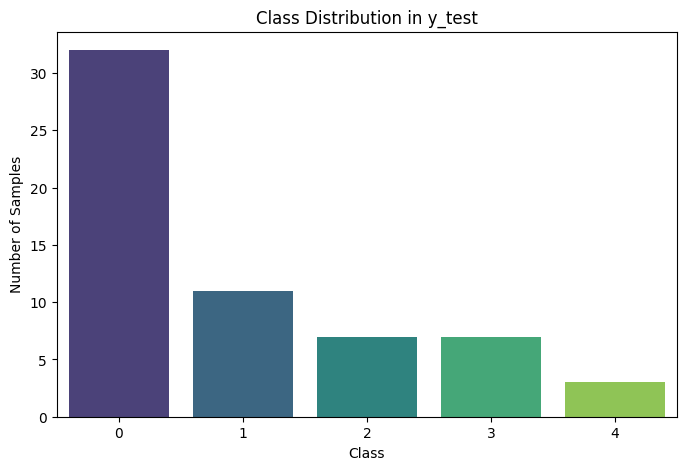

In [44]:
plt.figure(figsize=(8, 5))
sns.barplot(x=y_test.value_counts().index, y=y_test.value_counts().values, palette='viridis')
plt.title('Class Distribution in y_test')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.xticks(rotation=0)
plt.show()


**Reasoning**:
The previous code generated a `FutureWarning` because of how `palette` was used with `barplot` in `seaborn`. To address this, I will modify the `sns.barplot` call to explicitly assign the `x` variable to `hue` and set `legend=False` as suggested by the warning, ensuring future compatibility and best practices.



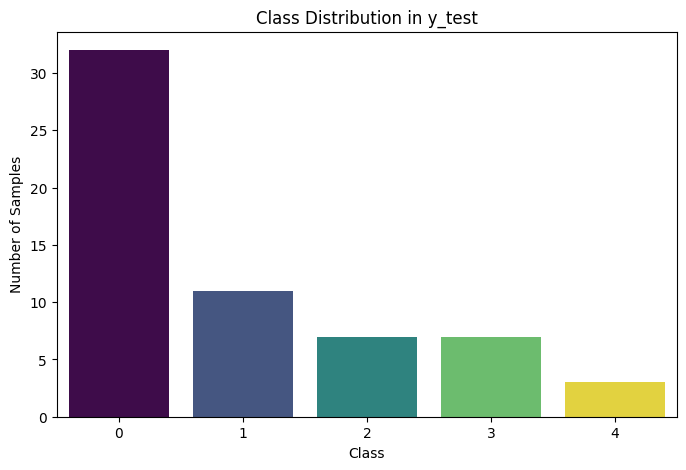

In [45]:
plt.figure(figsize=(8, 5))
sns.barplot(x=y_test.value_counts().index, y=y_test.value_counts().values, hue=y_test.value_counts().index, palette='viridis', legend=False)
plt.title('Class Distribution in y_test')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.xticks(rotation=0)
plt.show()

## Summary of Findings and Explanation for 0 Precision in Classes 2 and 4

### Class Distribution Analysis:
From `y_test.value_counts()` and the bar plot, we observe the following class distribution in the test set:
- Class 0: 32 samples
- Class 1: 11 samples
- Class 3: 7 samples
- Class 2: 7 samples
- Class 4: 3 samples

Classes 2 and 4 are minority classes, especially class 4 with only 3 samples, which makes them challenging for the model to learn and predict accurately.

### Confusion Matrix Analysis:
Let's re-examine the confusion matrix:
```
[[14  9  0  8  1]
 [ 0  4  0  6  1]
 [ 0  0  0  7  0]
 [ 0  1  0  5  1]
 [ 0  0  0  3  0]]
```

- **For Class 2 (True label = 2):**
  - The third row `[ 0  0  0  7  0]` indicates that all 7 actual samples belonging to class 2 were misclassified as class 3 (`7` in column 3). The model made **zero** correct predictions for class 2.
  - Looking at the third column (predictions for class 2), the values are `[0, 0, 0, 0, 0]`. This means the model **never predicted any sample as class 2**.
  - **Precision for Class 2 is 0.0** because the denominator (total number of samples predicted as class 2, which is the sum of the third column) is 0. Since the model never predicted class 2, there are no true positives for class 2, and therefore, precision (TP / (TP + FP)) is undefined or reported as 0.0.

- **For Class 4 (True label = 4):**
  - The fifth row `[ 0  0  0  3  0]` indicates that all 3 actual samples belonging to class 4 were misclassified as class 3 (`3` in column 3). The model made **zero** correct predictions for class 4.
  - Looking at the fifth column (predictions for class 4), the values are `[1, 1, 0, 1, 0]`. The sum of this column is 3. This means the model predicted 3 samples as class 4, but **none of these predictions were correct true positives** for class 4.
  - From the confusion matrix, there are no `TP` for class 4 (the value at `cm[4,4]` is 0). The model predicted 3 samples as class 4 (`cm[:,4]` sum is 3), but all of these were false positives (i.e., `cm[0,4]=1`, `cm[1,4]=1`, `cm[3,4]=1` are misclassifications of actual classes 0, 1, and 3 as class 4). Since True Positives (TP) for class 4 is 0, **Precision for Class 4 is 0.0** (TP / (TP + FP) = 0 / 3 = 0.0).

### Conclusion:
Classes 2 and 4 have 0 precision primarily due to the model's complete failure to correctly identify any samples belonging to these classes. For class 2, the model never predicted it at all. For class 4, while the model did make predictions for it, all of these predictions were incorrect (false positives), leading to zero true positives for class 4. This issue is exacerbated by the small number of samples for these classes in the test set, making it harder for the model to learn their distinct features and resulting in poor predictive performance.

## Final Task

### Subtask:
Summarize the findings from the class distribution analysis and the confusion matrix to explain why classes 2 and 4 have 0 precision.


## Summary:

### Q&A

**Why do classes 2 and 4 have 0 precision?**
Classes 2 and 4 have 0 precision due to the model's inability to correctly classify any samples belonging to these classes.
*   **For Class 2:** The model never predicted any sample as Class 2. The third column of the confusion matrix, representing predictions for Class 2, contains all zeros. Consequently, there are no True Positives (TP) for Class 2, leading to a precision of 0.0 (TP / (TP + FP) = 0 / 0, often reported as 0.0 or undefined).
*   **For Class 4:** While the model did predict 3 samples as Class 4, none of these predictions were correct. The `cm[4,4]` entry in the confusion matrix is 0, meaning there are no True Positives for Class 4. Since TP = 0, the precision is 0.0 (TP / (TP + FP) = 0 / 3 = 0.0).

This issue is exacerbated by the fact that both classes 2 and 4 are minority classes in the test set, with only 7 and 3 samples respectively.

### Data Analysis Key Findings

*   **Class Distribution in `y_test`:** The test set exhibits an imbalanced class distribution:
    *   Class 0: 32 samples
    *   Class 1: 11 samples
    *   Class 3: 7 samples
    *   Class 2: 7 samples
    *   Class 4: 3 samples
    Classes 2 and 4 are minority classes, with Class 4 being the most underrepresented.
*   **Confusion Matrix Analysis:**
    ```
    [[14  9  0  8  1]
     [ 0  4  0  6  1]
     [ 0  0  0  7  0]
     [ 0  1  0  5  1]
     [ 0  0  0  3  0]]
    ```
    *   For Class 2: All 7 actual samples of Class 2 were misclassified as Class 3 (`cm[2,3]=7`). The model never predicted any sample as Class 2 (the entire third column is zeros).
    *   For Class 4: All 3 actual samples of Class 4 were misclassified as Class 3 (`cm[4,3]=3`). The model predicted 3 samples as Class 4 (`cm[0,4]=1`, `cm[1,4]=1`, `cm[3,4]=1`), but all were false positives, meaning no true positive predictions for Class 4.

### Insights or Next Steps

*   The model struggles significantly with minority classes, especially classes 2 and 4, indicating a potential bias towards majority classes or insufficient learning from sparse data.
*   To improve performance for these classes, consider techniques such as data augmentation, oversampling minority classes (e.g., SMOTE), undersampling majority classes, using class weights in the model training, or exploring different model architectures that are more robust to imbalanced datasets.


In [47]:
# Convert 'num' to a binary 'target' class
df['target'] = df['num'].apply(lambda x: 1 if x > 0 else 0)

# Features and labels
X = df.drop(['num', 'target'], axis=1)
y = df['target']

# Train-test split (80:20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Pipeline Naive Bayes
model = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('nb', GaussianNB())
])

# Train model
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

# Evaluation
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1-score:", f1)

Accuracy: 0.85
Precision: 0.9130434782608695
Recall: 0.75
F1-score: 0.8235294117647058


Confusion Matrix:
[[30  2]
 [ 7 21]]


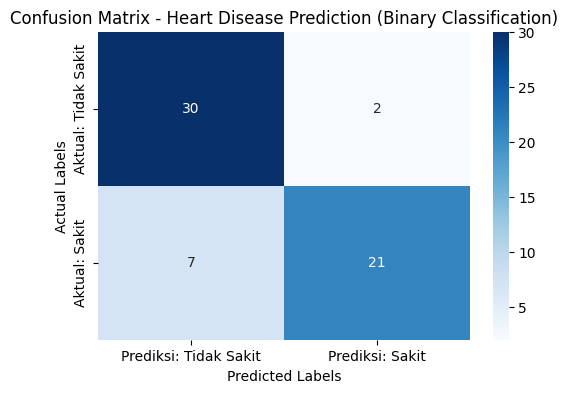

In [48]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Hitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Cetak matriks
print("Confusion Matrix:")
print(cm)

# Visualisasi heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Prediksi: Tidak Sakit", "Prediksi: Sakit"],
            yticklabels=["Aktual: Tidak Sakit", "Aktual: Sakit"])
plt.title("Confusion Matrix - Heart Disease Prediction (Binary Classification)")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()

In [50]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred, digits=4)
print("Classification Report:\n")
print(report)

Classification Report:

              precision    recall  f1-score   support

           0     0.8108    0.9375    0.8696        32
           1     0.9130    0.7500    0.8235        28

    accuracy                         0.8500        60
   macro avg     0.8619    0.8438    0.8465        60
weighted avg     0.8585    0.8500    0.8481        60

